# Film data story

## Imports

In [1]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Handling data

In [2]:
CHARACTER_DATA_PATH = '../data/character.metadata.tsv'
MOVIE_DATA_PATH = '../data/movie.metadata.tsv'
SUMMARIES_DATA_PATH = '../data/plot_summaries.txt'
NAME_DATA_PATH = '../data/name.clusters.txt'
TYPE_DATA_PATH = '../data/tvtropes.clusters.txt'

### Characters data

In [3]:
CHARACTER_HEADER = ['Wikipedia_movie_ID','Freebase_movie_ID','Movie_release_date','Character_name',
                    'Actor_date_of_birth','Actor_gender','Actor_height','Actor_ethnicity','Actor_name',
                    'Actor_age_at_movie_release','Freebase_character/actor_map_ID','Freebase_character_ID','Freebase_actor_ID']
character = pd.read_table(CHARACTER_DATA_PATH,header=None,names=CHARACTER_HEADER)

In [4]:
character['Actor_age_at_movie_release'] = character['Actor_age_at_movie_release'].apply(lambda x: np.nan if x < 0 else x)
character['Actor_height'] = character['Actor_height'].apply(lambda x: np.nan if x > 2.5 else x)
character['Movie_release_date'] = pd.to_datetime(character['Movie_release_date'],format='mixed',utc=True,errors='coerce')
character['Actor_date_of_birth'] = pd.to_datetime(character['Actor_date_of_birth'],format='mixed',utc=True,errors='coerce')
character.head()

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_release_date,Character_name,Actor_date_of_birth,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age_at_movie_release,Freebase_character/actor_map_ID,Freebase_character_ID,Freebase_actor_ID
0,975900,/m/03vyhn,2001-08-24 00:00:00+00:00,Akooshay,1958-08-26 00:00:00+00:00,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24 00:00:00+00:00,Lieutenant Melanie Ballard,1974-08-15 00:00:00+00:00,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24 00:00:00+00:00,Desolation Williams,1969-06-15 00:00:00+00:00,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24 00:00:00+00:00,Sgt Jericho Butler,1967-09-12 00:00:00+00:00,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24 00:00:00+00:00,Bashira Kincaid,1977-09-25 00:00:00+00:00,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


### Movies data

In [5]:
MOVIE_HEADER = ['Wikipedia_movie_ID','Freebase_movie_ID','Movie_name','Movie_release_date',
                'Movie_box_office_revenue','Movie_runtime','Movie_languages','Movie_countries','Movie_genres']

movie = pd.read_table(MOVIE_DATA_PATH,header=None,names=MOVIE_HEADER)

In [6]:
def format_dict(x):
    n = len(x)
    if n==0:
        return np.nan
    else:
        return ','.join(str(s) for s in list(x.values()))

movie['Movie_genres'] = movie['Movie_genres'].apply(json.loads).apply(format_dict)
movie['Movie_countries'] = movie['Movie_countries'].apply(json.loads).apply(format_dict)
movie['Movie_languages'] = movie['Movie_languages'].apply(json.loads).apply(format_dict)

In [7]:
movie['Movie_runtime'] = movie['Movie_runtime'].apply(lambda x: np.nan if x > 15000 else x)
movie['Movie_release_date'] = pd.to_datetime(movie['Movie_release_date'],format='mixed',utc=True,errors='coerce')
movie.head()

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24 00:00:00+00:00,14010832.0,98.0,English Language,United States of America,"Thriller,Science Fiction,Horror,Adventure,Supe..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16 00:00:00+00:00,NaN,95.0,English Language,United States of America,"Mystery,Biographical film,Drama,Crime Drama"
2,28463795,/m/0crgdbh,Brun bitter,1988-01-01 00:00:00+00:00,NaN,83.0,Norwegian Language,Norway,"Crime Fiction,Drama"
3,9363483,/m/0285_cd,White Of The Eye,1987-01-01 00:00:00+00:00,NaN,110.0,English Language,United Kingdom,"Thriller,Erotic thriller,Psychological thriller"
4,261236,/m/01mrr1,A Woman in Flames,1983-01-01 00:00:00+00:00,NaN,106.0,German Language,Germany,Drama


### Summaries data

In [8]:
summaries = pd.read_table(SUMMARIES_DATA_PATH,header=None,names=['Wikipedia_movie_ID','Summary'])
summaries.head()

,Wikipedia_movie_ID,Summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


### Character names data

In [9]:
name = pd.read_table(NAME_DATA_PATH,header=None,names=['Character_name','Freebase_character/actor_map_ID'])
name.head()

,Character_name,Freebase_character/actor_map_ID
0,Stuart Little,/m/0k3w9c
1,Stuart Little,/m/0k3wcx
2,Stuart Little,/m/0k3wbn
3,John Doe,/m/0jyg35
4,John Doe,/m/0k2_zn


### Character types data

In [10]:
character_type = pd.read_table(TYPE_DATA_PATH,header=None,names=['Character_type','Instance'])
character_type = pd.concat([character_type, character_type['Instance'].apply(json.loads).apply(pd.Series)], axis=1)
character_type.drop(columns='Instance',inplace=True)
character_type.rename(columns={'char': 'Character_name','movie': 'Movie_name','id': 'Freebase_character/actor_map_ID',
                               'actor': 'Actor_name'},inplace=True)
character_type.head()

,Character_type,Character_name,Movie_name,Freebase_character/actor_map_ID,Actor_name
0,absent_minded_professor,Professor Philip Brainard,Flubber,/m/0jy9q0,Robin Williams
1,absent_minded_professor,Professor Keenbean,Richie Rich,/m/02vchl3,Michael McShane
2,absent_minded_professor,Dr. Reinhardt Lane,The Shadow,/m/0k6fkc,Ian McKellen
3,absent_minded_professor,Dr. Harold Medford,Them!,/m/0k6_br,Edmund Gwenn
4,absent_minded_professor,Daniel Jackson,Stargate,/m/0k3rhh,James Spader


## Visualizing data

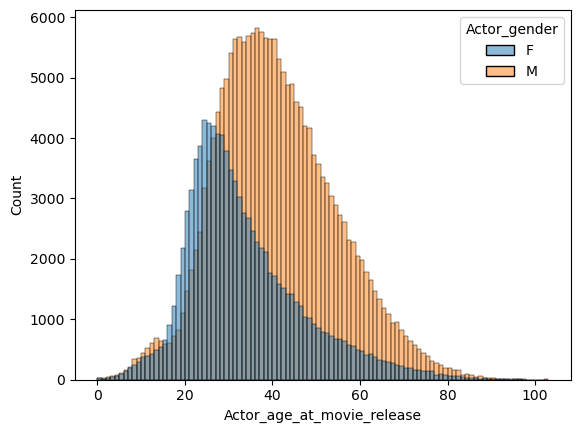

In [11]:
n_bins=int(character['Actor_age_at_movie_release'].max()-character['Actor_age_at_movie_release'].min()+1)
sns.histplot(data=character,x='Actor_age_at_movie_release',hue='Actor_gender',binwidth=1);

(1.4, 2.1)

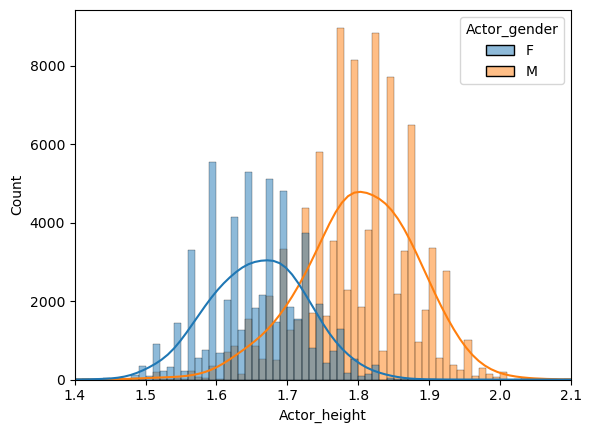

In [12]:
sns.histplot(data=character,x='Actor_height',hue='Actor_gender',binwidth=0.01,kde=True,kde_kws={'bw_adjust':3})
plt.xlim([1.4,2.1])

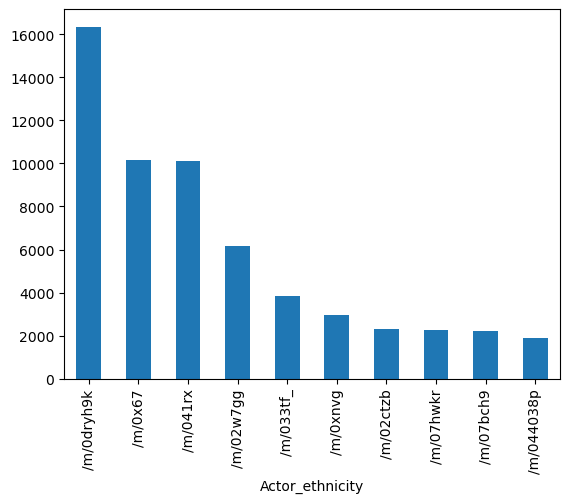

In [13]:
character['Actor_ethnicity'].value_counts().head(10).plot(kind='bar');

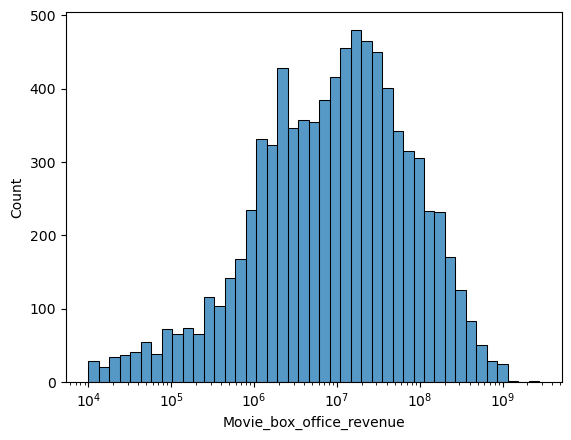

In [14]:
sns.histplot(data=movie,x='Movie_box_office_revenue',log_scale=True);

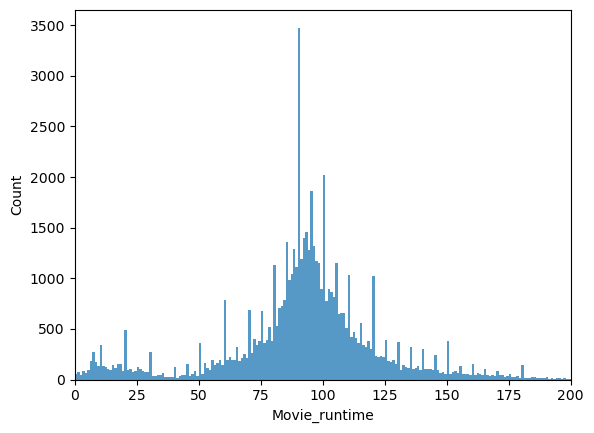

In [15]:
sns.histplot(data=movie,x='Movie_runtime',binwidth=1);
plt.xlim([0,200]);

- Lots of movie of 90 min

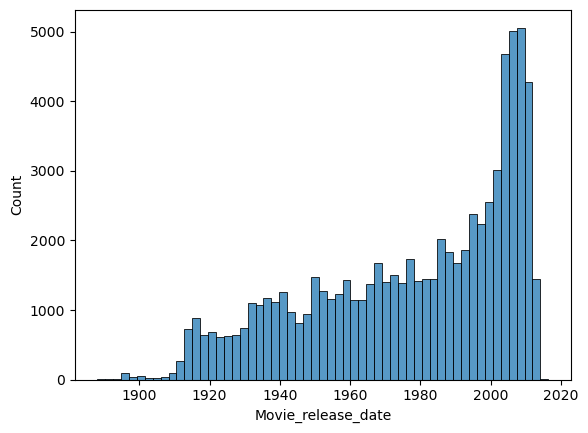

In [16]:
sns.histplot(data=movie,x='Movie_release_date');

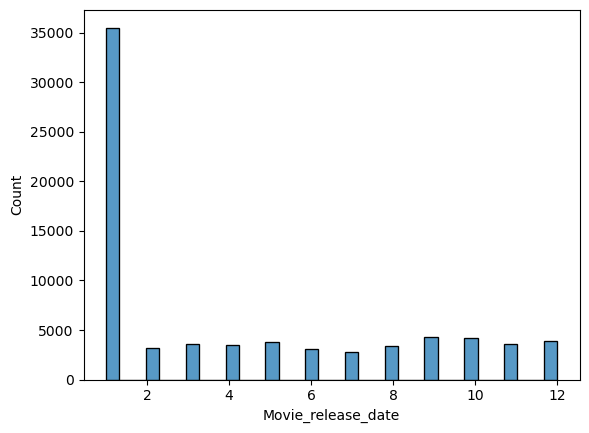

In [17]:
sns.histplot(movie['Movie_release_date'].apply(lambda x: x.month));

- Because of `pd.to_datetime` which converts to the first day of the year a date with only the year indicated
- If monthly or daily analysis wanted, use `format = "%Y-%m-%d"`as argument of `pd.to_datetime`

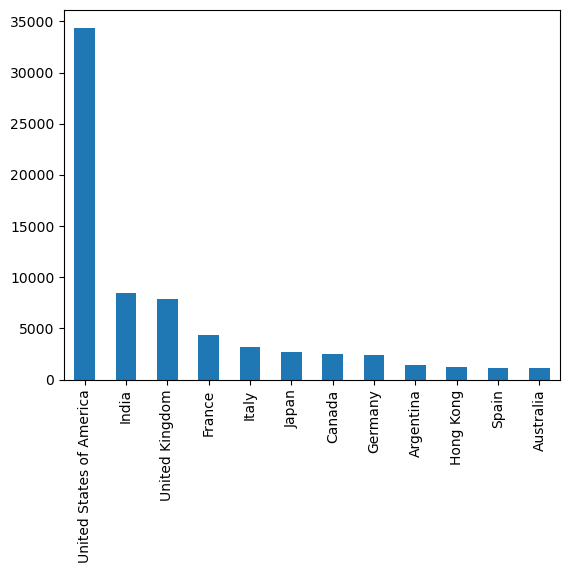

In [18]:
movie_countries= movie['Movie_countries'].str.get_dummies(sep=',').sum().sort_values(ascending=False)
movie_countries.loc[movie_countries.values>=1000].plot(kind='bar');

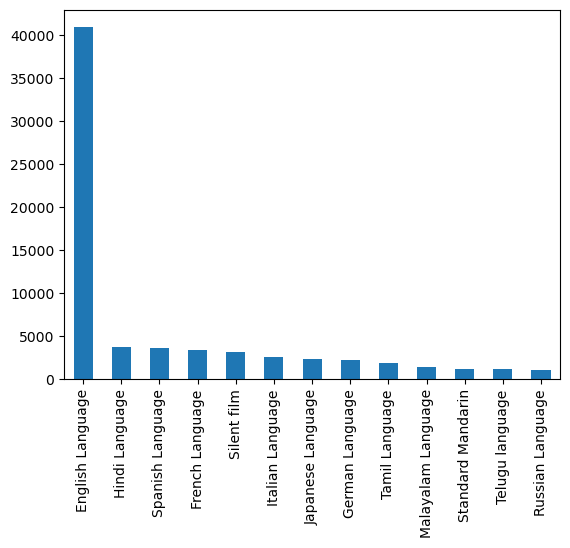

In [19]:
movie_language = movie['Movie_languages'].str.get_dummies(sep=',').sum().sort_values(ascending=False)
movie_language.loc[movie_language.values>=1000].plot(kind='bar');

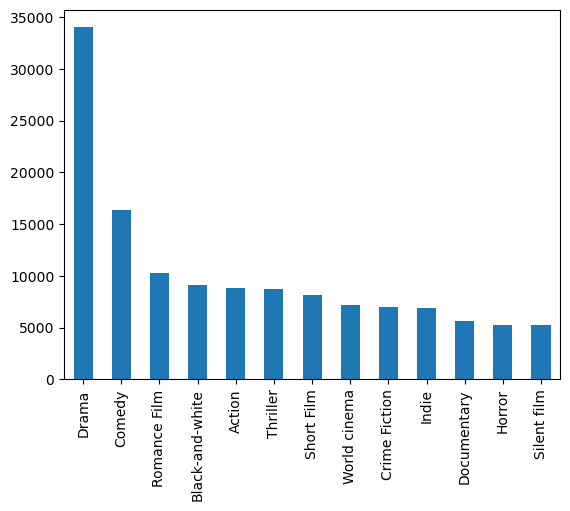

In [20]:
movie_genres = movie['Movie_genres'].str.get_dummies(sep=',').sum().sort_values(ascending=False)
movie_genres.loc[movie_genres.values>=5000].plot(kind='bar');

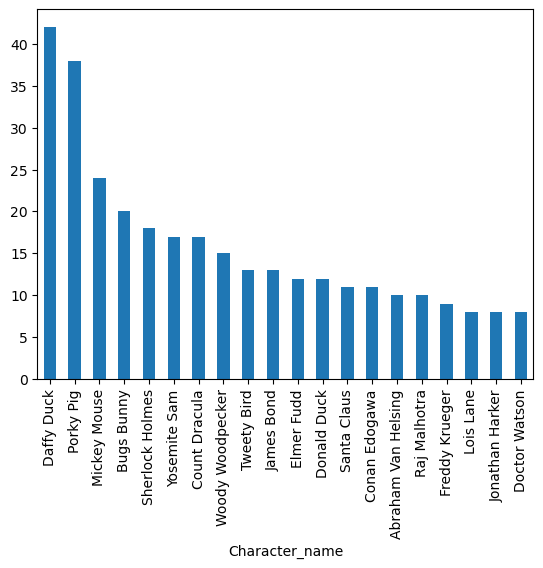

In [21]:
name['Character_name'].value_counts().head(20).plot(kind='bar');

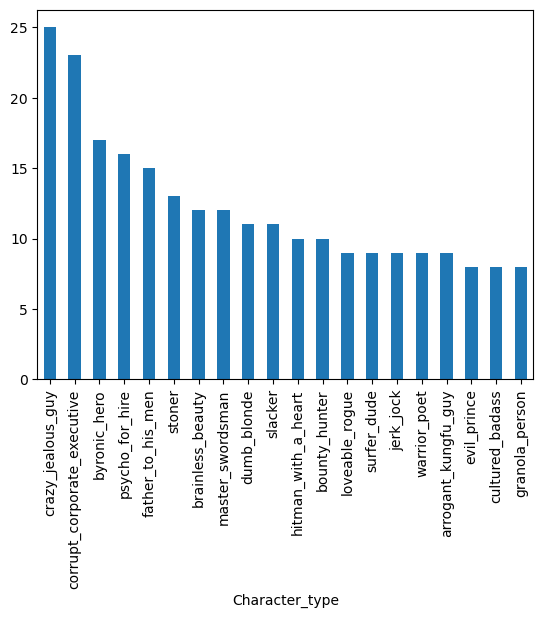

In [22]:
character_type['Character_type'].value_counts().head(20).plot(kind='bar');